# Examen de manipulación de imágenes

### Tercer parcial

0226594 Sara Carolina Gómez Delgado

0224969 Luis Eduardo Robles Jiménez

## Imports and utils

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## Pregunta 1.

In [79]:
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

def structural_array(structural_element, origin):
    c = []
    for i in range(structural_element.shape[0]):
        for j in range(structural_element.shape[1]):
            if structural_element[i,j]:
                c.append(np.subtract([i,j], origin))
    return np.array(c)
def erode(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in struct_array:
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1
            nImg[i, j] = trueCounter == struct_array.shape[0] 
    return nImg
def dilate(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in struct_array:
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1
            nImg[i, j] = trueCounter > 0
    return nImg
def within_image(img, coor):
    return coor[0] >= 0 and coor[0] < img.shape[0] and coor[1] >= 0 and coor[1] < img.shape[1]

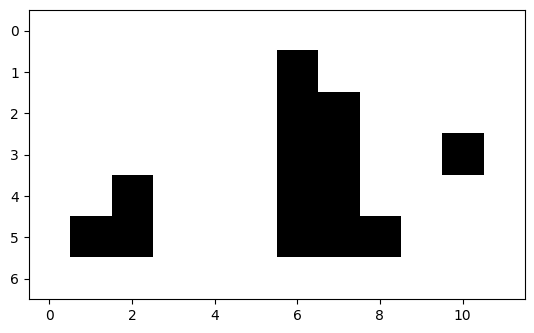

In [80]:
plt.imshow(cv.bitwise_not(image), cmap = "gray")

### Erode

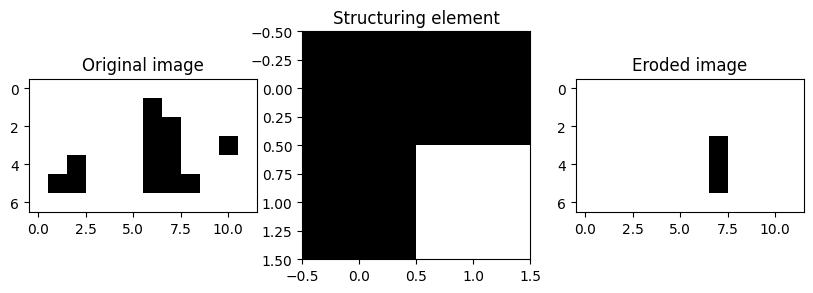

In [83]:
k = np.array([[1, 1], [1, 0]])
s = structural_array(k, np.array([1, 1]))
eroded = erode(image, s)
plt.figure(figsize = (10, 15))
a = plt.subplot(1, 3, 1)
a.imshow(cv.bitwise_not(image), cmap = "gray")
plt.title("Original image")
b = plt.subplot(1, 3, 2)
b.imshow(cv.bitwise_not(k), cmap = "gray")
plt.title("Structuring element")
c = plt.subplot(1, 3, 3)
plt.title("Eroded image")
c.imshow(cv.bitwise_not(eroded), cmap = "gray")

### Dilate

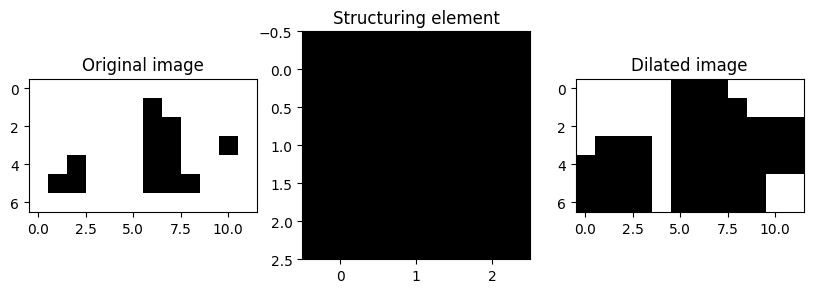

In [84]:
k = np.ones((3, 3))
s = structural_array(k, np.array([1, 1]))
dilated = dilate(image, s)
plt.figure(figsize = (10, 15))
a = plt.subplot(1, 3, 1)
a.imshow(cv.bitwise_not(image), cmap = "gray")
plt.title("Original image")
b = plt.subplot(1, 3, 2)
b.imshow(cv.bitwise_not(k), cmap = "gray")
plt.title("Structuring element")
c = plt.subplot(1, 3, 3)
plt.title("Dilated image")
c.imshow(cv.bitwise_not(dilated), cmap = "gray")